In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
import scipy

%matplotlib inline

In [2]:
twigs = misc.imread("hps.png")

In [3]:
print type(twigs), twigs.shape, twigs.dtype

<type 'numpy.ndarray'> (381, 547, 3) uint8


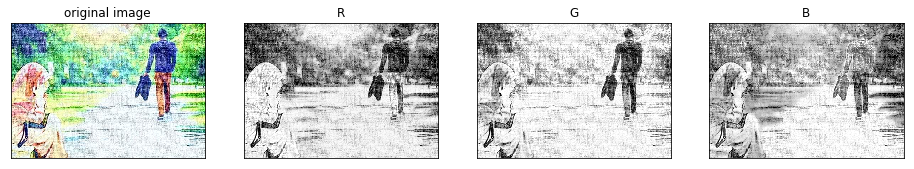

In [4]:
plt.figure(figsize=(16,4))

plt.subplot(141)
plt.imshow(twigs)
plt.title("original image")
plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.title("R")
plt.imshow(twigs[:,:,0], cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.title("G")
plt.imshow(twigs[:,:,1], cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.title("B")
plt.imshow(twigs[:,:,2], cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

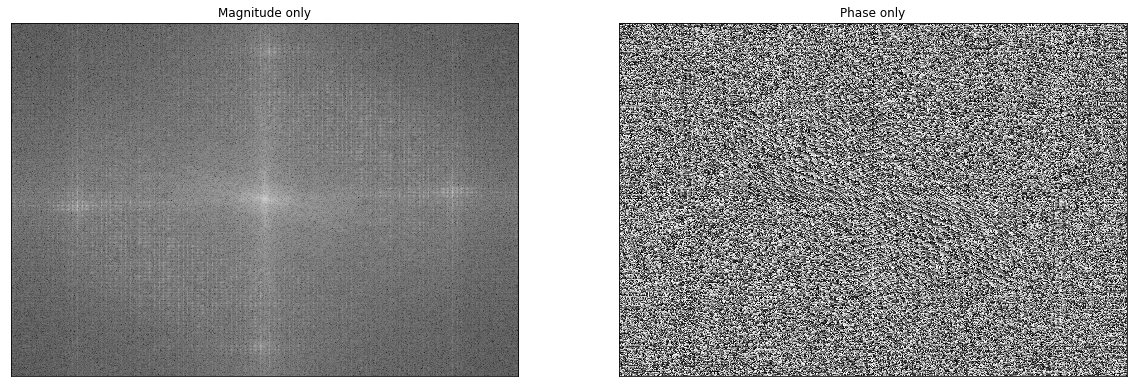

In [15]:
f = np.fft.fft2(twigs[:,:,0])
fshift = np.fft.fftshift(f)

mag = np.abs(fshift); phase = np.angle(fshift)
#real = fshift.real; imag = fshift.imag

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(np.log(mag), cmap='gray')
plt.title('Magnitude only')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(phase, cmap='gray')
plt.title('Phase only')
plt.xticks([]), plt.yticks([])

plt.show()

In [16]:
rows, cols = twigs[:,:,0].shape
print rows, cols
crow, ccol = rows/2 , cols/2
print crow, ccol

381 547
190 273


In [17]:
mask = np.ones(mag.shape)
xcenter = 70
ycenter = 25
width = 15

# mask[crow-width:crow+width, :ccol-center] = 0
# mask[crow-width:crow+width, ccol+center:] = 0
# mask[:crow-center, ccol-width:ccol+width] = 0
# mask[crow+center:, ccol-width:ccol+width] = 0
mask[crow-width:crow+width, xcenter-width:xcenter+width] = 0
mask[crow-width:crow+width, cols-xcenter-width:cols-xcenter+width] = 0
mask[ycenter-width:ycenter+width, ccol-width:ccol+width] = 0
mask[rows-ycenter-width:rows-ycenter+width, ccol-width:ccol+width] = 0

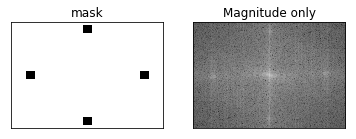

In [18]:
plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.title('mask')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(np.log(mag), cmap='gray')
plt.title('Magnitude only')
plt.xticks([]), plt.yticks([])

plt.show()

In [19]:
newmag = mag*mask

/home/ridlo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log


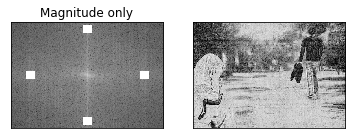

In [20]:
newfshift = newmag*np.exp(1j*phase)

f_ishift = np.fft.ifftshift(newfshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121); plt.imshow(np.log(newmag), cmap='gray'); plt.title('Magnitude only')
plt.xticks([]), plt.yticks([])

plt.subplot(122); plt.imshow(img_back, cmap='gray') 
plt.xticks([]), plt.yticks([])
plt.show()

In [21]:
newimage = np.zeros(twigs.shape)

for i in range(3):
    f = np.fft.fft2(twigs[:,:,i])
    fshift = np.fft.fftshift(f)

    mag = np.abs(fshift)
    phase = np.angle(fshift)

    mask = np.ones(mag.shape)
    center = 42
    width = 2
    mask[crow-width:crow+width, :ccol-center] = 0
    mask[crow-width:crow+width, ccol+center:] = 0
    mask[:crow-center, ccol-width:ccol+width] = 0
    mask[crow+center:, ccol-width:ccol+width] = 0
    
    newmag = mag * mask
    newfshift = newmag * np.exp(1j*phase)

    f_ishift = np.fft.ifftshift(newfshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    
    newimage[:,:,i] = img_back/img_back.max()
    #twigs[:,:,i].min() + \
    #(img_back - img_back.min()) * \
    #((twigs[:,:,i].max() - twigs[:,:,i].min())/(img_back.max() - img_back.min())) # renormalize

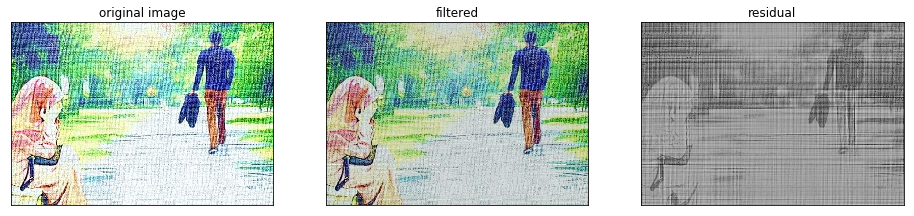

In [22]:
plt.figure(figsize=(16,5))

plt.subplot(131)
plt.imshow(twigs)
plt.title("original image")
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(newimage)
plt.title("filtered")
plt.xticks([]), plt.yticks([])

residu = twigs[:,:,0] - newimage[:,:,0]*255
plt.subplot(133)
plt.imshow(residu, cmap='gray')
plt.title("residual")
plt.xticks([]), plt.yticks([])


plt.show()

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

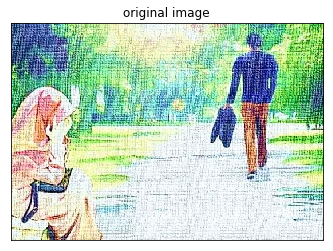

In [24]:
plt.imshow(twigs)
plt.title("original image")
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

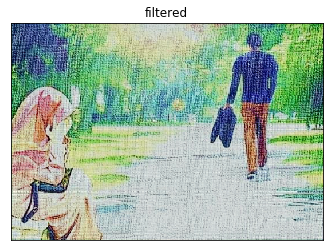

In [23]:
plt.imshow(newimage)
plt.title("filtered")
plt.xticks([]), plt.yticks([])